# 1. Fourie transform이 왜 중요한가?

푸리에 변환(Fourier transform)은 신호처리, 음성, 통신 분야에서 뿐만 아니라 영상처리에서도 매우 중요한 개념으로 다양한 응용을 가지고 있습니다. 영상을 주파수 성분으로 변환하여 다양한 분석 및 처리를 할 수 있고 임의의 필터링 연산을 fft(fast Fourier transform)를 이용하여 고속으로 구현할 수도 있습니다. 그리고 푸리에 변환과 같은 근원적인 이론들은 특정 응용에 국한되지 않기 때문에 한번 알아두면 분야를 떠나서 두고두고 도움이 됩니다.

출처 : https://darkpgmr.tistory.com/171

# 2. Fourie transform은 일생상활 어디에 활용되는가

위에서 fourie transform은 특정 응용에 국한되지 않는다고 이미 기술했다. 그 중에서도 우리 주위에서는 noise canceling이나, sound editing등에서 발견할 수 있다. fourie transform은 정리하자면, 어떠한 입력신호를 여러개의 주파수의 합으로 쪼개겠다는 것이다. 그렇기 때문에 특정한 주파수를 발견할 수 있다면, 그것을 제거하거나(noise canceling) 아니면 추가로 변환하거나(sound editing)을 할 수도 있다.

# 3. Fourie transform을 활용 가능한 알고리즘이나 패키지에는 무엇이 있는가

scipy의 Fourier Transforms (scipy.fft)이 있다. numpy의 것도 있지만, scipy의 것이 계산 속도가 훨씬 빠르다는 장점이 있다.

fftfreq()로 필요한 진동수를 만들어낼 수 있다.
fft()에 값을 집어넣어 fft를 구현할 수 있다.

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

input wavenumber (~50) : 23


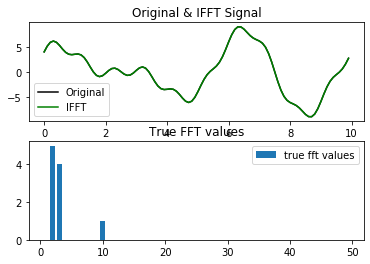

In [4]:
## 1. Import modules
import matplotlib.pyplot as plt
from numpy import arange, ones, pi
from scipy import cos, sin
from scipy.fftpack import fft, fftfreq


## 2. Set up for domain & Creating signal
n   = 100          # 한 파장당 지점 개수
Lx  = 10           # 한 파장의 거리 (혹은 시간)
L   = Lx/(2*pi)    # 파장
omg = 2.0*pi/Lx    # 각진동수

x   = arange(0, n)/Lx       # x축 : n개의 지점, Lx의 길이를 한 파장으로 가정
y1  = 5.0*sin( 2.0*omg*x)   # 파수  2에 해당하는 사인파
y2  = 4.0*cos( 3.0*omg*x)   # 파수  3에 해당하는 코사인파
y3  = 1.0*sin(10.0*omg*x)   # 파수 10에 해당하는 사인파
y   = y1 + y2 + y3 # + 1    # 임의의 파동 y (상수값을 추가하려면 주석을 해제할 것)


## 3. Preparatory steps
# 파수 = 진동수 * 지점 개수
freqs = fftfreq(n)    # 필요한 모든 진동수를 만든다.
mask = freqs > 0      # 절반의 값을 무시
nwaves = freqs*n      # 도메인 길이에 따른 파수


## 4. FFT calculations
fft_vals = fft(y)               # FFT 계산
fft_norm = fft_vals*(1.0/n)     # FFT 계산된 결과를 정규화
fft_theo = 2.0*abs(fft_norm)    # 푸리에 계수 계산

# 계산하고싶은 파수의 범위를 지정 (0~50 사이의 숫자를 입력)
wavenumber = int(input("input wavenumber (~50) : ",))

x0  = ones(n)
origin = fft_norm.real[0]*x0    # 상수부분인 푸리에 계수를 a0 더함

for k in range(1, wavenumber+1):    # 푸리에계수 an, bn을 이용해 IFFT 구현
    origin +=   2 * fft_norm.real[k] * cos(k*omg*x) + \
              (-2)* fft_norm.imag[k] * sin(k*omg*x)


## 5. Check result
# 1. 임의의 파동 y
plt.figure()
plt.subplot(211)
plt.plot(x, y, color='k', label='Original')
plt.plot(x, origin, color='g', label='IFFT')
plt.title("Original & IFFT Signal")
plt.legend()

# 2. 푸리에 계수
plt.subplot(212)
plt.bar(freqs[mask]*n, fft_theo[mask], label="true fft values")
plt.title("True FFT values")
plt.axhline(y=0, linewidth=1, color='k')
plt.legend()
plt.show()

# https://m.blog.naver.com/PostView.nhn?blogId=gudrb1707&logNo=221276702029&proxyReferer=https:%2F%2Fwww.google.com%2F

# 4. Fourie transform의 핵심 아이디어는 무엇인가?

step2에서 이미 fourie transform이란 어떠한 입력신호를 여러개의 주파수의 합으로 쪼개는 것이라 설명했다. 쉽게 말하자면 이것은 즉 여러 데이터의 결과물인 C에서 C가 어떤 것들로 구성되어 있는지 유추하겠다는 것(decompose)이다.

우리가 입력신호를 sensing할 때, 그래프의 높이 변화로 형태를 파악할 수 있다. (여기서 생각하기 간단하도록 주파수의 y값은 0이상이라고 가정하자)그 때 이 그래프를 하나의 원에 감는다고 했을 때, 우리는 특정한 도형을 만들어낼 수 있다. 이 도형은 일종의 벡터로 그래프를 표현한 것이라 할 수 있다. 그래프의 크기 변화에 따라 벡터가 변화할 것이고, 그것에 따라 이 도형의 모양이 정해진다. 그리고 이 도형은 cycle을 변형시키면서 형태를 변형시킬 수 있다. 즉, 관점에 따라 우리가 조절 가능한 factor로 변화시킬 수 있다는 것이다. 그리고 cycle을 변형시키며 도형의 꼴을 바꾸다 보면, 어느 순간에 도형이 겹쳐지며 원점 주위에만 돌던 무게중심이 갑자기 튀며 이동하는 순간이 오는 것을 발견할 수 있다. fourie변환의 발상은 여기서 시작된다.

그런데 이 특징은, 여러 그래프를 합쳤을 때도 발견할 수 있다. 여러 주파수를 합친 개형에서 합쳐지는 데 들어간 재료 그래프의 주파수와 cycle이 일치한 순간, 또다시 무게중심이 튀게 된다. 이러한 방식으로 해당 그래프에 어떠한 주파수가 들어가 있는지를 확인할 수 있는 것이다. 실제의 fourie transform은 복소수도 포함되고 훨씬 복잡하지만, 핵심 아이디어는 위와 같다.